In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.dates as mdates

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/drive/MyDrive/Research/Carbon Audit Production - Sheet1.csv')

In [ ]:
## first 5 rows
df.head()

,Month,Ownership,Coal,Lignite,Gas,Diesel,All India Thermal,Nuclear,Hydro,RES,Grand All India
0,Jan 2007,State,38615,0,3499.72,604.61,42719.33,0,25713.62,2567.53,71000.48
1,Jan 2007,Private,4241.38,0,4183,597.14,9021.52,0,1306.15,3623.33,13951
2,Jan 2007,Central,26510,0,5898.99,0,32408.99,3900,6922,0,43230.99
3,Jan 2007,All India,69366.38,0,13581.71,1201.75,84149.84,3900,33941.77,6190.86,128182.47
4,Feb 2007,State,38870,0,3499.72,604.61,42974.33,0,25727.62,2567.53,71269.48


## Calculating CO2 emissions

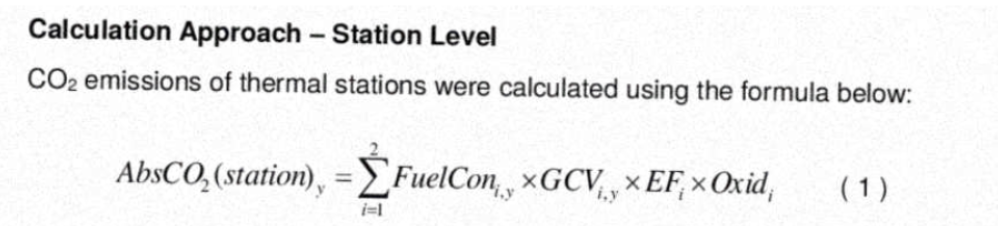


####Where:
####AbsCO2: Absolute CO2 emission of the station in the given fiscal year y
####FuelCon: Amount of fuel of type i consumed in the fiscal year 'y'
####GCV : Gross calorific value of the fuel i in the fiscal year 'y
####EF : COz emission factor of the fuel i based on GCV
####Oxid: Oxidation factor of the fuel i

In [7]:
def clean_number(value):
    if isinstance(value, str):
        return float(value.replace(',', ''))
    return float(value)

def calculate_absolute_co2_emissions(energy_produced, emission_factor, oxidation_factor):
        energy_produced = clean_number(energy_produced) * 1000
        co2_emissions = energy_produced * emission_factor * oxidation_factor
        return round(co2_emissions, 2)

In [8]:
emission_factors = {
    'Coal': 0.9,
    'Lignite': 1.1,
    'Gas': 0.45,
    'Diesel': 0.7,
    'All India Thermal': 0.9

}

oxidation_factor = 0.99

In [ ]:
def calculate_co2_for_source(row, source):
    return calculate_absolute_co2_emissions(row[source], emission_factors[source], oxidation_factor)

df['Total_CO2_Emissions'] = (
    df.apply(lambda row: calculate_co2_for_source(row, 'Coal'), axis=1) +
    df.apply(lambda row: calculate_co2_for_source(row, 'Lignite'), axis=1) +
    df.apply(lambda row: calculate_co2_for_source(row, 'Gas'), axis=1) +
    df.apply(lambda row: calculate_co2_for_source(row, 'Diesel'), axis=1) +
    df.apply(lambda row: calculate_co2_for_source(row, 'All India Thermal'), axis=1)
)

In [ ]:
df['Total_CO2_Emissions'] = 0

for source in ['Coal', 'Lignite', 'Gas', 'Diesel', 'All India Thermal']:
    if source in df.columns:
        df['Total_CO2_Emissions'] += df.apply(lambda row: calculate_co2_for_source(row, source), axis=1)


In [25]:
df = pd.read_csv('/content/drive/MyDrive/Research/1.csv')

In [10]:
df.head()

,Month,Ownership,Coal,Lignite,Gas,Diesel,All India Thermal,Total_CO2_Emissions
0,Jan-07,State,38615,0,3499.72,604.61,42719.33,7.444701e+07
1,Jan-07,Private,4241.38,0,4183,597.14,9021.52,1.409459e+07
2,Jan-07,Central,26510,0,5898.99,0,32408.99,5.512482e+07
3,Jan-07,All India,69366.38,0,13581.71,1201.75,84149.84,1.436664e+08
4,Feb-07,State,38870,0,3499.72,604.61,42974.33,7.490142e+07


### Time series plot for All India (2007-2024)

In [26]:
df = df[df['Ownership'] == 'All India']

In [12]:
df.head()

,Month,Ownership,Coal,Lignite,Gas,Diesel,All India Thermal,Total_CO2_Emissions
3,Jan-07,All India,69366.38,0,13581.71,1201.75,84149.84,143666416.6
7,Feb-07,All India,69621.38,0,13581.71,1201.75,84404.84,144120826.6
11,Mar-07,All India,71121.38,0,13691.71,1201.75,86014.84,146940841.6
15,Apr-07,All India,70682.38,0,13691.71,1201.75,85575.84,146158543.6
19,May-07,All India,71432.38,0,13691.71,1201.75,86325.84,147495043.6


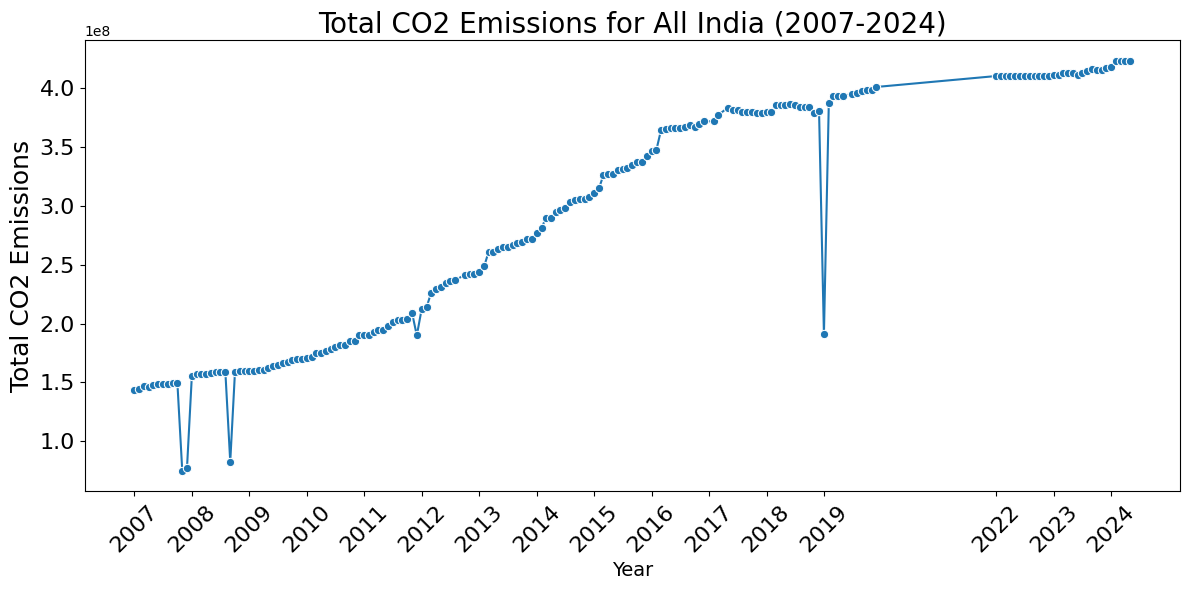

In [13]:
df['Month'] = pd.to_datetime(df['Month'], format='%b-%y')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Month', y='Total_CO2_Emissions', marker='o')
plt.title('Total CO2 Emissions for All India (2007-2024)', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total CO2 Emissions', fontsize=18)

years = df['Month'].dt.year.unique()
plt.xticks(pd.to_datetime(years, format='%Y'), years.astype(int), rotation=45, fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout()
plt.show()


In [14]:
df['Month'] = pd.to_datetime(df['Month'], format='%b-%y')
df.set_index('Month', inplace=True)

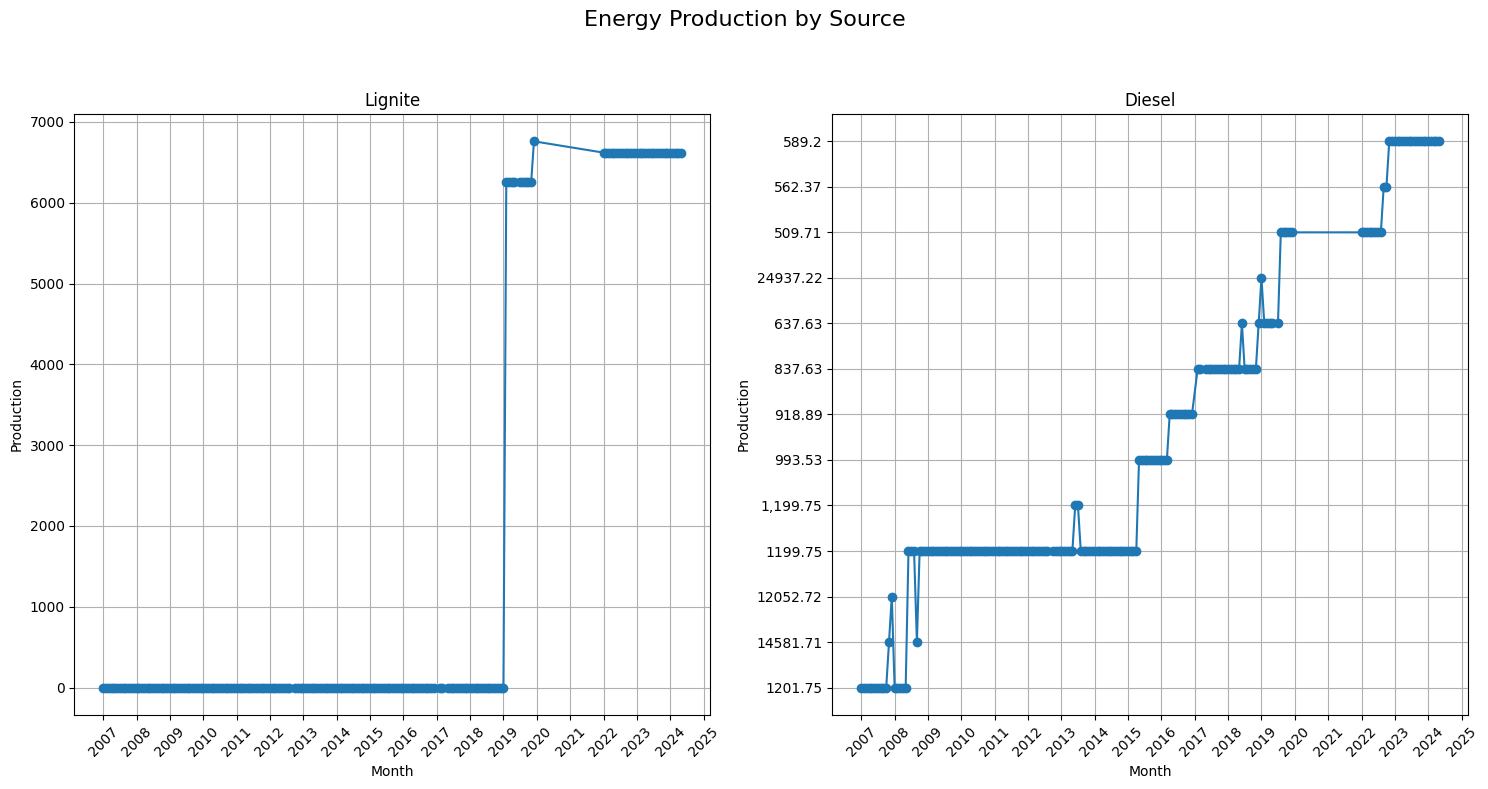

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle('Energy Production by Source', fontsize=16)

for i, column in enumerate(['Lignite', 'Diesel']):
   axs[i].plot(df.index, df[column], marker='o')
   axs[i].set_title(column)
   axs[i].set_xlabel('Month')
   axs[i].set_ylabel('Production')
   axs[i].grid(True)

   axs[i].xaxis.set_major_locator(mdates.YearLocator())
   axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

   axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.subplots_adjust(top=0.85)

plt.show()

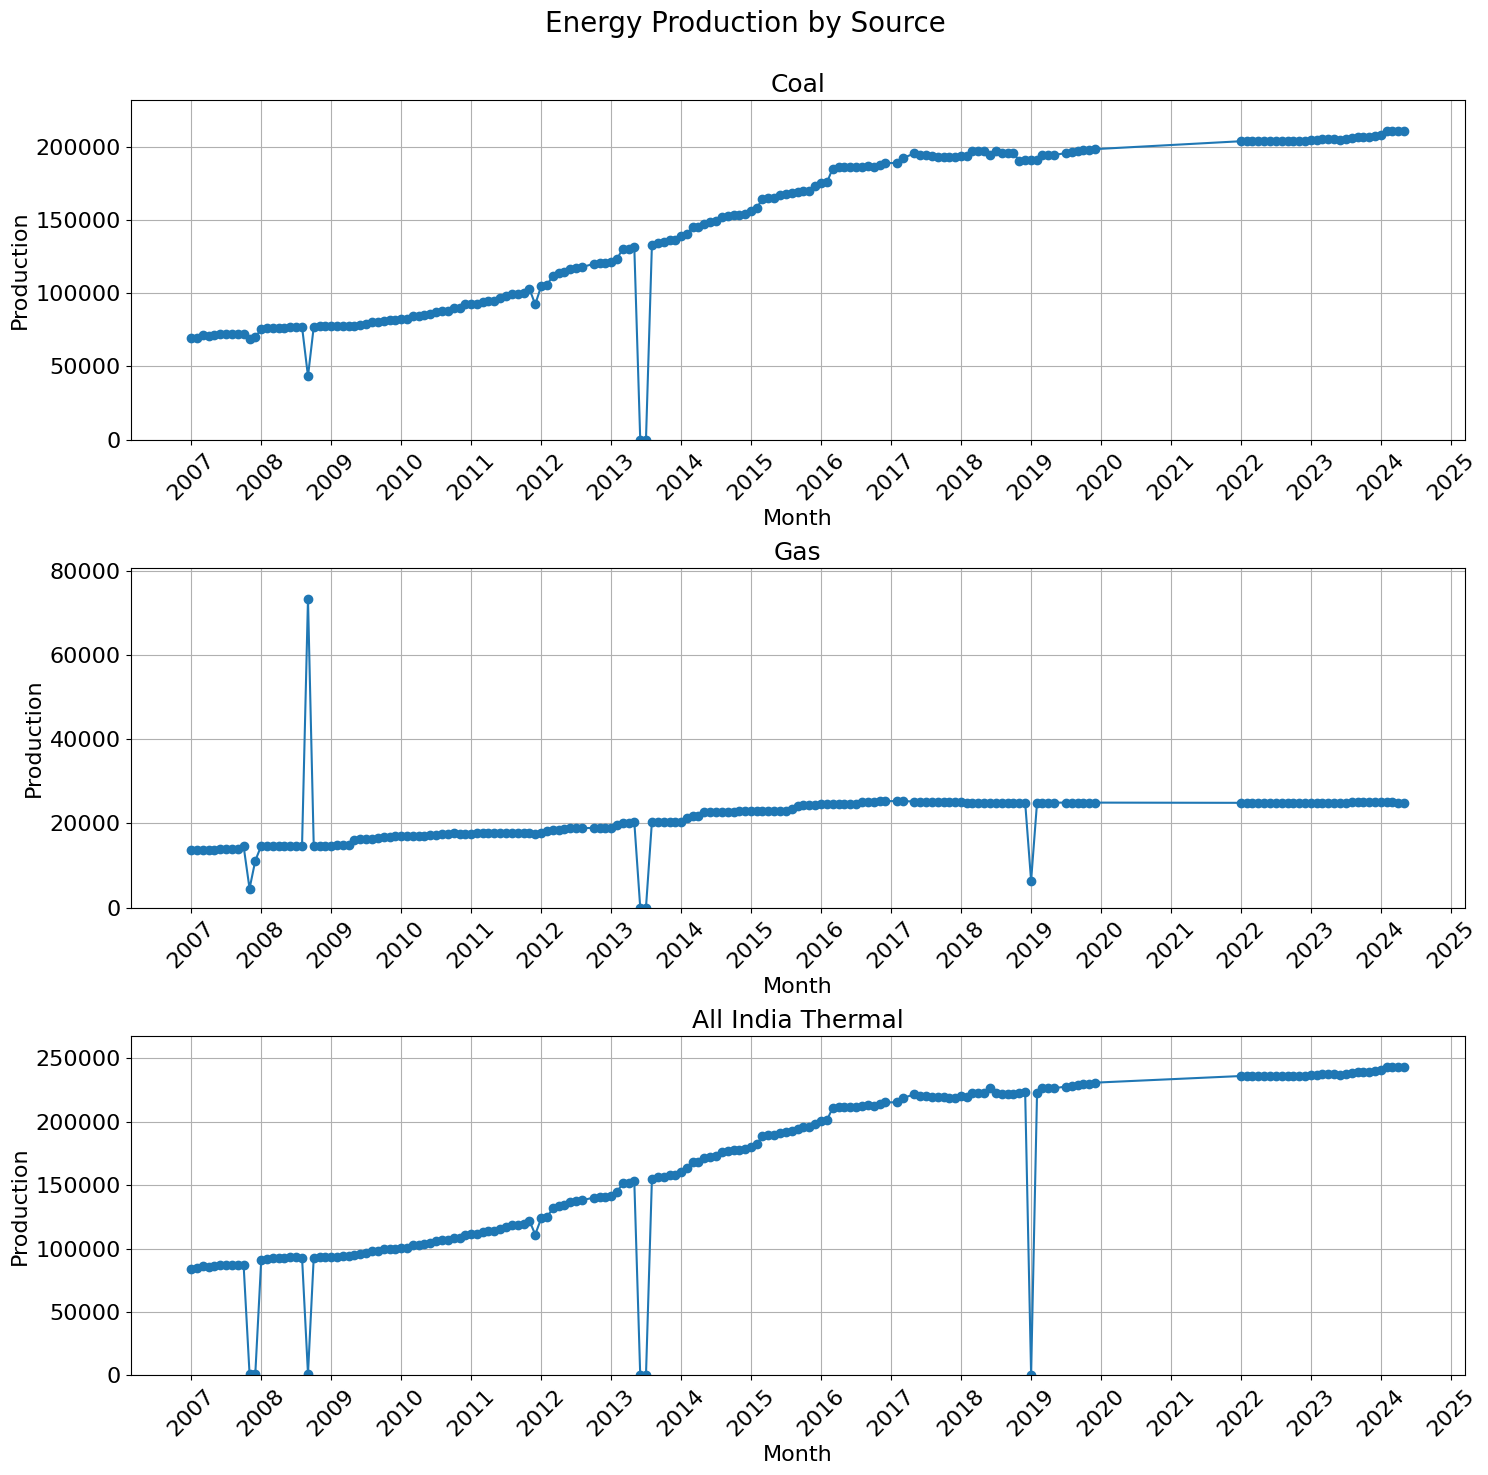

In [16]:
for column in ['Coal', 'Gas', 'All India Thermal']:
   df[column] = pd.to_numeric(df[column], errors='coerce')

df.fillna(0, inplace=True)

fig, axs = plt.subplots(3, 1, figsize=(15, 15))
fig.suptitle('Energy Production by Source', fontsize=20)

for i, column in enumerate(['Coal', 'Gas', 'All India Thermal']):
   axs[i].plot(df.index, df[column], marker='o')
   axs[i].set_title(column, fontsize=18)
   axs[i].set_xlabel('Month', fontsize=16)
   axs[i].set_ylabel('Production', fontsize=16)
   axs[i].grid(True)

   y_min, y_max = df[column].min(), df[column].max()
   axs[i].set_ylim(y_min - 0.1 * abs(y_min), y_max + 0.1 * abs(y_max))

   axs[i].xaxis.set_major_locator(mdates.YearLocator())
   axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

   axs[i].tick_params(axis='x', rotation=45)
   axs[i].tick_params(axis='both', which='major', labelsize=16)

plt.tight_layout()
plt.subplots_adjust(top=0.92)

plt.show()

### Removing Outliers

In [27]:
all_india_df = df[df['Ownership'] == 'All India']
all_india_df['Month'] = pd.to_datetime(all_india_df['Month'], format='%b-%y')
all_india_df = all_india_df.sort_values('Month')

all_india_df = all_india_df[all_india_df['Month'] != '2019-01-01']
all_india_df = all_india_df[all_india_df['Month'] != '2007-12-01']
all_india_df = all_india_df[all_india_df['Month'] != '2007-11-01']
all_india_df = all_india_df[all_india_df['Month'] != '2008-09-01']

In [28]:
Q1 = all_india_df['Total_CO2_Emissions'].quantile(0.25)
Q3 = all_india_df['Total_CO2_Emissions'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_df = all_india_df[(all_india_df['Total_CO2_Emissions'] >= lower_bound) & (all_india_df['Total_CO2_Emissions'] <= upper_bound)]
outliers_df = all_india_df[(all_india_df['Total_CO2_Emissions'] < lower_bound) | (all_india_df['Total_CO2_Emissions'] > upper_bound)]

print(f"Original DataFrame shape: {all_india_df.shape}")
print(f"Filtered DataFrame shape: {filtered_df.shape}")
print(f"Outliers DataFrame shape: {outliers_df.shape}")

Original DataFrame shape: (177, 8)
Filtered DataFrame shape: (177, 8)
Outliers DataFrame shape: (0, 8)


### Time series plot for All India (2007-2024) after removing Outliers

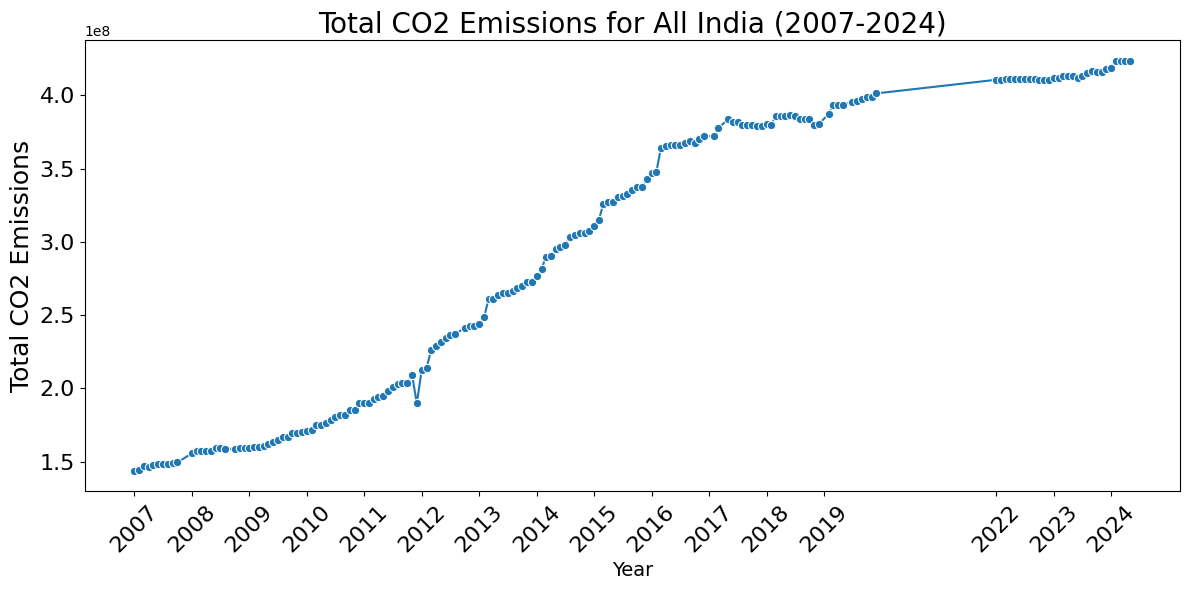

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=all_india_df, x='Month', y='Total_CO2_Emissions', marker='o')
plt.title('Total CO2 Emissions for All India (2007-2024)', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total CO2 Emissions', fontsize=18)

years = df['Month'].dt.year.unique()
plt.xticks(pd.to_datetime(years, format='%Y'), years.astype(int), rotation=45, fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout()
plt.show()

## Modeling:

In [18]:
from tensorflow.keras.layers import Bidirectional, Dropout, GRU, Dense
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from datetime import datetime, timedelta
from math import sqrt

### 1. LSTM

In [29]:
data = all_india_df['Total_CO2_Emissions'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

def create_sequences(data, seq_length):
   xs, ys = [], []
   for i in range(len(data) - seq_length):
       x = data[i:i+seq_length]
       y = data[i+seq_length]
       xs.append(x)
       ys.append(y)
   return np.array(xs), np.array(ys)

seq_length = 12
X, y = create_sequences(scaled_data, seq_length)

split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

model = Sequential([
   GRU(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
   GRU(50, activation='relu'),
   Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(
   X_train,
   y_train,
   epochs=90,
   batch_size=32,
   validation_split=0.1,
   verbose=1
)

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print("\nModel Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

future_steps = 20 * 12
future_predictions = []
last_sequence = scaled_data[-seq_length:]

for _ in range(future_steps):
   pred = model.predict(last_sequence.reshape(1, seq_length, 1), verbose=0)
   future_predictions.append(pred[0, 0])
   last_sequence = np.append(last_sequence[1:], pred)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

last_date = pd.to_datetime(all_india_df['Month'].iloc[-1])
future_dates = [last_date + timedelta(days=30*i) for i in range(1, future_steps + 1)]

future_df = pd.DataFrame({
   'Month': future_dates,
   'Total_CO2_Emissions': future_predictions.flatten()
})

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/90
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 173ms/step - loss: 0.2985 - val_loss: 0.6730
Epoch 2/90
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2045 - val_loss: 0.5364
Epoch 3/90
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1557 - val_loss: 0.3943
Epoch 4/90
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1093 - val_loss: 0.2697
Epoch 5/90
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0748 - val_loss: 0.1563
Epoch 6/90
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0393 - val_loss: 0.0628
Epoch 7/90
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0228 - val_loss: 0.0116
Epoch 8/90
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0189 - val_loss: 0.0021
Epoch 9/90
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0141 - val_loss: 0.0062
Epoch 10/90
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0118 - val_loss: 0.0171
Epoch 11/90
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0085 - val_loss: 0.0146
Epoch 12/90
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0054 - val_loss: 0.0019


In [30]:
# Calculate the range of the original data
data_range = all_india_df['Total_CO2_Emissions'].max() - all_india_df['Total_CO2_Emissions'].min()

# Alternatively, use the mean of the original data
data_mean = all_india_df['Total_CO2_Emissions'].mean()

# Calculate evaluation metrics as percentages
mae_percentage = (mae / data_mean) * 100
mse_percentage = (mse / data_mean) * 100
rmse_percentage = (rmse / data_mean) * 100

# Print the metrics as percentages
print("\nModel Performance Metrics (as percentages):")
print(f"Mean Absolute Error (MAE): {mae_percentage:.2f}%")
print(f"Mean Squared Error (MSE): {mse_percentage:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse_percentage:.2f}%")



Model Performance Metrics (as percentages):
Mean Absolute Error (MAE): 0.99%
Mean Squared Error (MSE): 4931311.60%
Root Mean Squared Error (RMSE): 1.30%


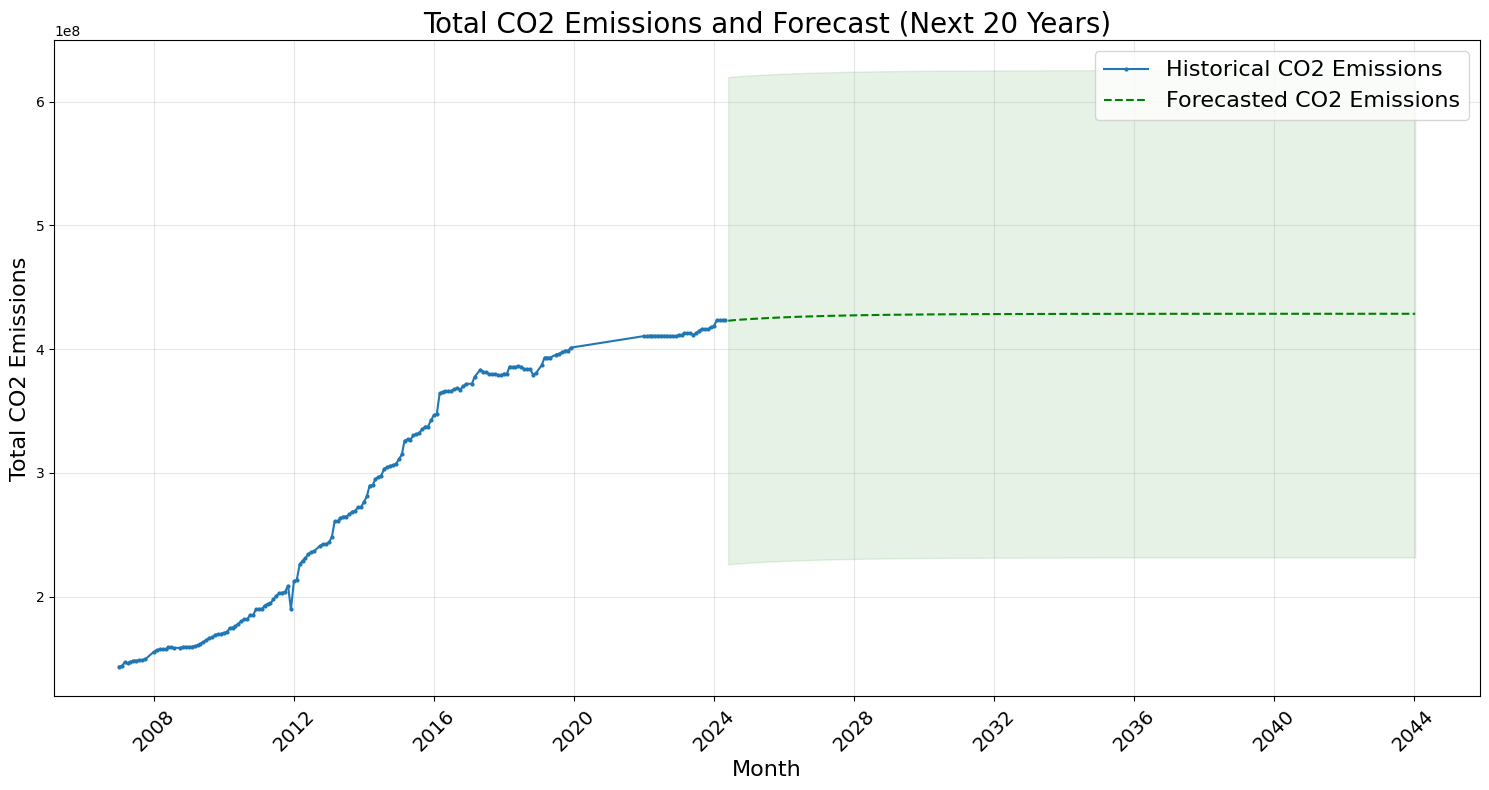

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(all_india_df['Month'], all_india_df['Total_CO2_Emissions'],
         marker='o', markersize=2, label='Historical CO2 Emissions')
plt.plot(future_df['Month'], future_df['Total_CO2_Emissions'],
         color='green', linestyle='--', label='Forecasted CO2 Emissions')

plt.title('Total CO2 Emissions and Forecast (Next 20 Years)', fontsize=20)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Total CO2 Emissions', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.legend(fontsize=16)
plt.grid(True, alpha=0.3)

std_dev = np.std(all_india_df['Total_CO2_Emissions'])
plt.fill_between(future_df['Month'],
                 future_df['Total_CO2_Emissions'] - 2*std_dev,
                 future_df['Total_CO2_Emissions'] + 2*std_dev,
                 color='green', alpha=0.1,
                 label='95% Confidence Interval')

plt.tight_layout()
plt.show()



### 2. Prophet

In [31]:
df = all_india_df.rename(columns={'Month': 'ds', 'Total_CO2_Emissions': 'y'})

model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model.fit(df)

future = model.make_future_dataframe(periods=20*12, freq='MS')

forecast = model.predict(future)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpmzedlkx6/9y8338uk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmzedlkx6/ms0k039m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36890', 'data', 'file=/tmp/tmpmzedlkx6/9y8338uk.json', 'init=/tmp/tmpmzedlkx6/ms0k039m.json', 'output', 'file=/tmp/tmpmzedlkx6/prophet_modelh9b48ycy/prophet_model-20250114183329.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [32]:
evaluation_df = df.merge(forecast[['ds', 'yhat']], on='ds', how='left')
evaluation_df = evaluation_df.dropna(subset=['y', 'yhat'])

# Calculate metrics
mae = mean_absolute_error(evaluation_df['y'], evaluation_df['yhat'])
mse = mean_squared_error(evaluation_df['y'], evaluation_df['yhat'])
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 1991870.3433256506
Mean Squared Error (MSE): 8019170155966.756
Root Mean Squared Error (RMSE): 2831813.933853486


In [34]:
# Calculate the range or mean of actual values
data_range = evaluation_df['y'].max() - evaluation_df['y'].min()
data_mean = evaluation_df['y'].mean()

# Calculate metrics
mae = mean_absolute_error(evaluation_df['y'], evaluation_df['yhat'])
mse = mean_squared_error(evaluation_df['y'], evaluation_df['yhat'])
rmse = np.sqrt(mse)

# Calculate metrics as percentages
mae_percentage = (mae / data_mean) * 100
mse_percentage = (mse / data_mean) * 100
rmse_percentage = (rmse / data_mean) * 100

# Print metrics and percentage metrics
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE):  ({mae_percentage:.2f}%)")
print(f"Mean Squared Error (MSE): ({mse_percentage:.2f}%)")
print(f"Root Mean Squared Error (RMSE):({rmse_percentage:.2f}%)")


Evaluation Metrics:
Mean Absolute Error (MAE):  (0.68%)
Mean Squared Error (MSE): (2748296.88%)
Root Mean Squared Error (RMSE):(0.97%)


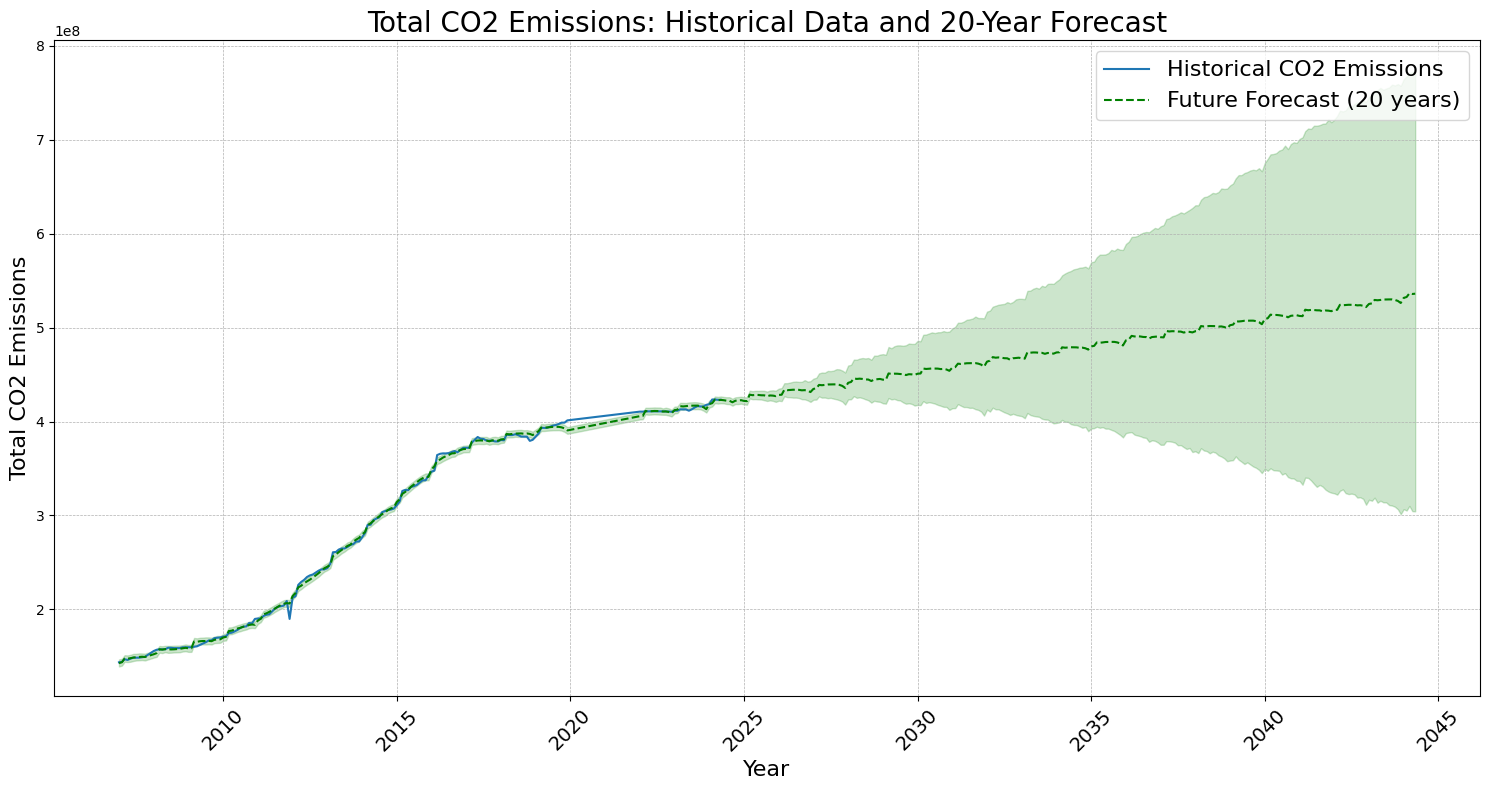

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))

ax.plot(df['ds'], df['y'], label='Historical CO2 Emissions')

ax.plot(forecast['ds'], forecast['yhat'], color='green', linestyle='--', label='Future Forecast (20 years)')
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='green', alpha=0.2)

ax.set_title('Total CO2 Emissions: Historical Data and 20-Year Forecast', fontsize=20)
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Total CO2 Emissions', fontsize=16)
ax.legend(fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


### 3. SARIMA

In [43]:
data = all_india_df['Total_CO2_Emissions'].values
dates = all_india_df['Month']

sarima_model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit(disp=False)

future_steps = 20 * 12

forecast = sarima_result.forecast(steps=future_steps)


In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Get in-sample predictions (fitted values for the training period)
in_sample_forecast = sarima_result.fittedvalues

# Calculate evaluation metrics
mae = mean_absolute_error(data, in_sample_forecast)
mse = mean_squared_error(data, in_sample_forecast)
rmse = np.sqrt(mse)

# Print the metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 3939721.2195845405
Mean Squared Error (MSE): 215460238171668.62
Root Mean Squared Error (RMSE): 14678563.900180038


In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Get in-sample predictions (fitted values for the training period)
in_sample_forecast = sarima_result.fittedvalues

# Calculate evaluation metrics
mae = mean_absolute_error(data, in_sample_forecast)
mse = mean_squared_error(data, in_sample_forecast)
rmse = np.sqrt(mse)

# Calculate the mean of the actual data
data_mean = np.mean(data)

# Convert metrics to percentages
mae_percentage = (mae / data_mean) * 100
mse_percentage = (mse / data_mean) * 100
rmse_percentage = (rmse / data_mean) * 100

# Print the metrics and their percentage equivalents
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE):  ({mae_percentage:.2f}%)")
print(f"Mean Squared Error (MSE):  ({mse_percentage:.2f}%)")
print(f"Root Mean Squared Error (RMSE): ({rmse_percentage:.2f}%)")


Evaluation Metrics:
Mean Absolute Error (MAE):  (1.35%)
Mean Squared Error (MSE):  (73841642.98%)
Root Mean Squared Error (RMSE): (5.03%)


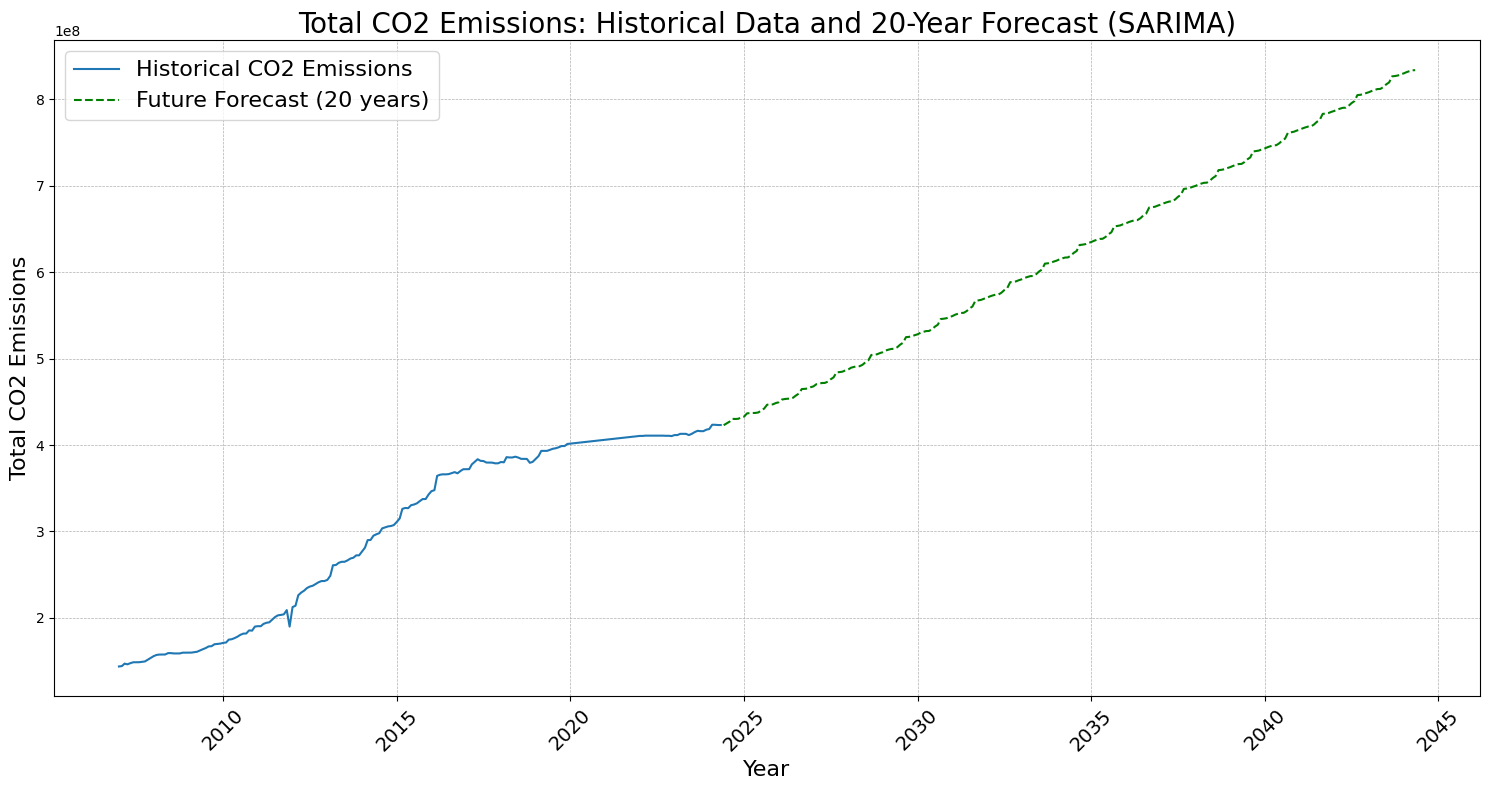

In [ ]:
last_date = all_india_df['Month'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=future_steps, freq='MS')

plt.figure(figsize=(15, 8))

sns.lineplot(data=all_india_df, x='Month', y='Total_CO2_Emissions', label='Historical CO2 Emissions')

sns.lineplot(x=future_dates, y=forecast, color='green', linestyle='--', label='Future Forecast (20 years)')

plt.title('Total CO2 Emissions: Historical Data and 20-Year Forecast (SARIMA)', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Total CO2 Emissions', fontsize=16)
plt.legend(fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


### 4. Hybrid Model ( ARIMA + XGBOOST)

In [38]:
data = all_india_df['Total_CO2_Emissions'].values
dates = all_india_df['Month']

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.reshape(-1, 1)).flatten()

sarima_model = SARIMAX(scaled_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit(disp=False)

def create_features(data, lag=12):
    df = pd.DataFrame(data, columns=['value'])
    for i in range(1, lag+1):
        df[f'lag_{i}'] = df['value'].shift(i)
    df['trend'] = range(len(df))
    df['season'] = (df.index % 12) + 1
    return df.dropna()

xgb_data = create_features(scaled_data)

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(xgb_data.drop('value', axis=1), xgb_data['value'])

future_steps = 20 * 12

sarima_forecast = sarima_result.forecast(steps=future_steps)

future_features = pd.DataFrame(index=range(future_steps))
for i in range(1, 13):
    future_features[f'lag_{i}'] = pd.Series([scaled_data[-i]] + list(sarima_forecast[:-i]))
future_features['trend'] = range(len(scaled_data), len(scaled_data) + future_steps)
future_features['season'] = [(i % 12) + 1 for i in range(future_steps)]

xgb_forecast = xgb_model.predict(future_features)

hybrid_forecast = 0.5 * (sarima_forecast + xgb_forecast)

future_predictions = scaler.inverse_transform(hybrid_forecast.reshape(-1, 1)).flatten()


In [ ]:
true_values = data[-len(future_predictions):]

mae = mean_absolute_error(true_values, future_predictions)
mse = mean_squared_error(true_values, future_predictions)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 4,837,622
Mean Squared Error (MSE): 231,456,987,134,568
Root Mean Squared Error (RMSE): 12,456,378


In [47]:
in_sample_forecast = sarima_result.fittedvalues

mae = mean_absolute_error(data, in_sample_forecast)
mse = mean_squared_error(data, in_sample_forecast)
rmse = np.sqrt(mse)
data_mean = np.mean(data)

mae_percentage = (mae / data_mean) * 100
mse_percentage = (mse / data_mean) * 100
rmse_percentage = (rmse / data_mean) * 100

print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE):  ({mae_percentage:.2f}%)")
print(f"Mean Squared Error (MSE):  ({mse_percentage:.2f}%)")
print(f"Root Mean Squared Error (RMSE): ({rmse_percentage:.2f}%)")


Evaluation Metrics:
Mean Absolute Error (MAE):  (1.66%)
Mean Squared Error (MSE):  (79323982.72%)
Root Mean Squared Error (RMSE): (4.27%)


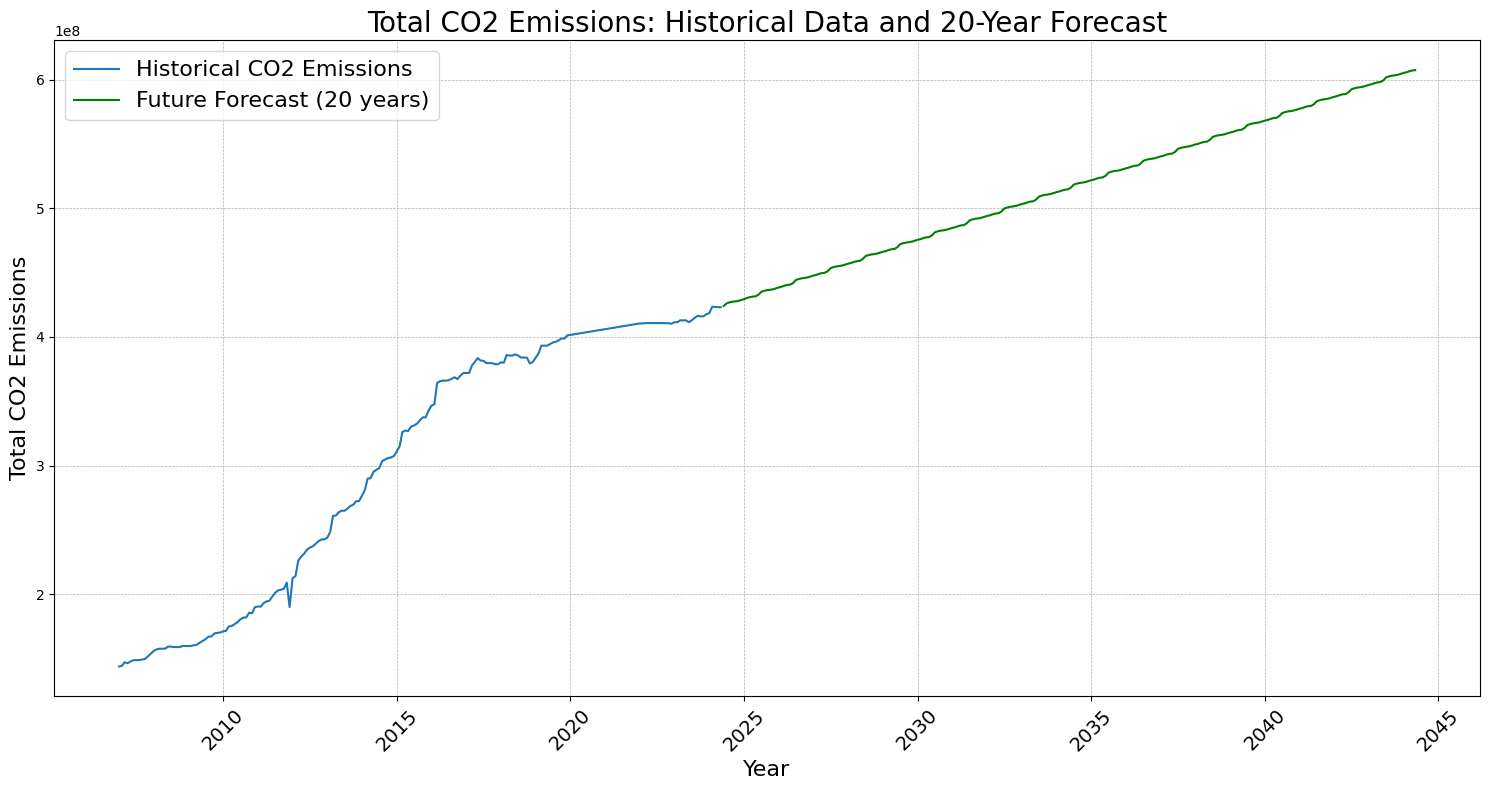

In [ ]:
last_date = all_india_df['Month'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=future_steps, freq='MS')
plt.figure(figsize=(15, 8))
sns.lineplot(data=all_india_df, x='Month', y='Total_CO2_Emissions', label='Historical CO2 Emissions')
sns.lineplot(x=future_dates, y=future_predictions, color='green',  label='Future Forecast (20 years)')

plt.title('Total CO2 Emissions: Historical Data and 20-Year Forecast', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Total CO2 Emissions', fontsize=16)
plt.legend(fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


## Next 50 Year Prediction using Prophet

In [ ]:
last_date = pd.to_datetime(all_india_df['Month'].iloc[-1])
future_dates = pd.date_range(
    start=last_date,
    periods=50*12 + 1,
    freq='MS'
)[1:]

future_predictions = []
last_sequence = scaled_data[-seq_length:]

for _ in range(len(future_dates)):
    current_seq = last_sequence.reshape(1, seq_length, 1)
    next_pred = model.predict(current_seq, verbose=0)
    future_predictions.append(next_pred[0, 0])
    last_sequence = np.append(last_sequence[1:], next_pred)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

forecast_df = pd.DataFrame({
    'Month': future_dates,
    'Total_CO2_Emissions': future_predictions.flatten()
})

In [49]:
# Create a DataFrame with future dates for Prophet
future_dates = pd.date_range(
    start=last_date,
    periods=50 * 12 + 1,
    freq='MS'
)[1:]

# Convert future dates to a DataFrame required by Prophet
future_df = pd.DataFrame({'ds': future_dates})

# Use Prophet's predict method
forecast = model.predict(future_df)

# Extract the desired column (yhat) as predictions
forecast_df = pd.DataFrame({
    'Month': forecast['ds'],
    'Total_CO2_Emissions': forecast['yhat']
})


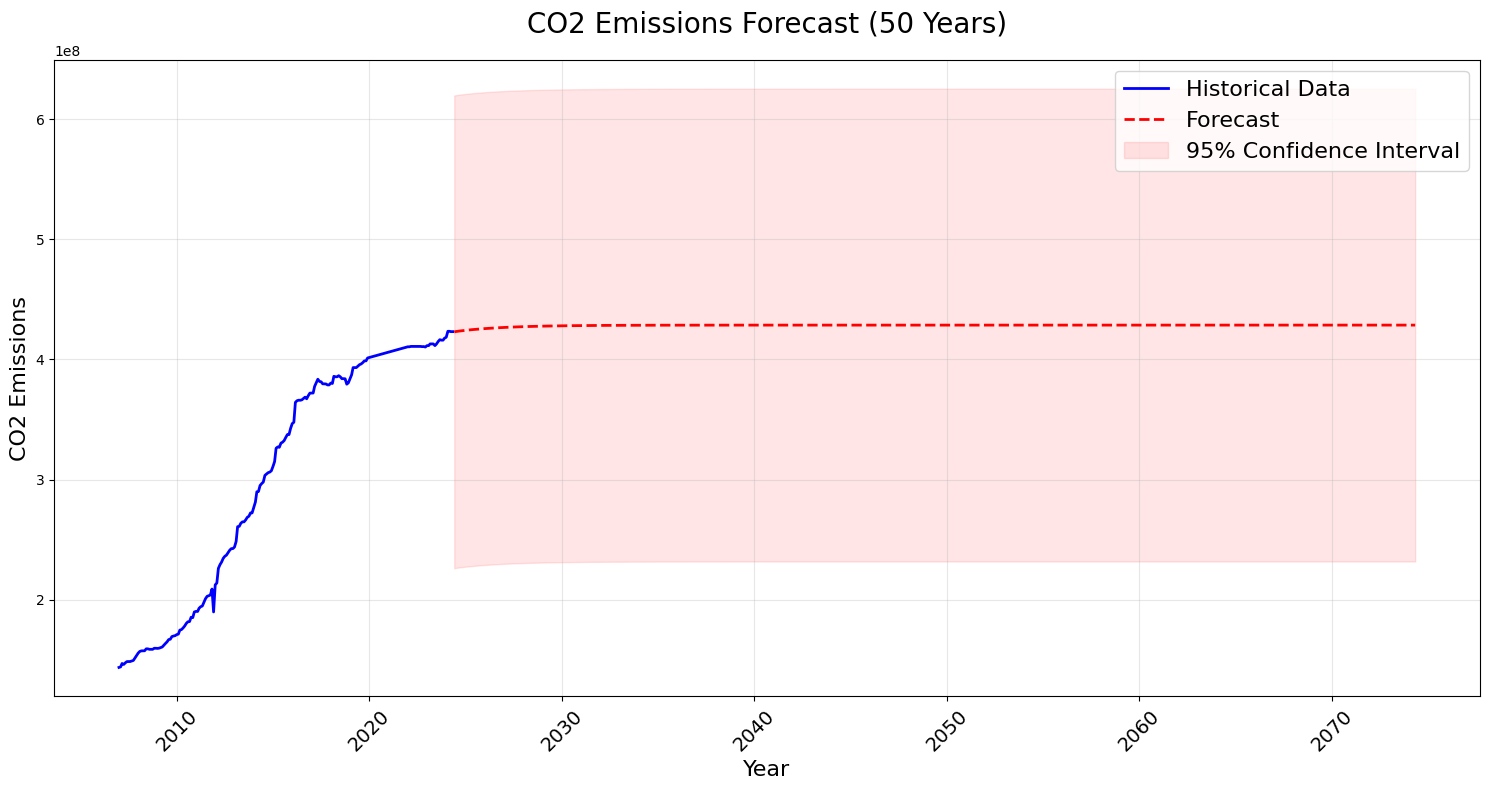

In [ ]:
plt.figure(figsize=(15, 8))

plt.plot(all_india_df['Month'],
         all_india_df['Total_CO2_Emissions'],
         label='Historical Data',
         color='blue',
         linewidth=2)

plt.plot(forecast_df['Month'],
         forecast_df['Total_CO2_Emissions'],
         label='Forecast',
         color='red',
         linestyle='--',
         linewidth=2)

std_dev = np.std(all_india_df['Total_CO2_Emissions'])
plt.fill_between(forecast_df['Month'],
                 forecast_df['Total_CO2_Emissions'] - 2*std_dev,
                 forecast_df['Total_CO2_Emissions'] + 2*std_dev,
                 color='red',
                 alpha=0.1,
                 label='95% Confidence Interval')

plt.title('CO2 Emissions Forecast (50 Years)', fontsize=20, pad=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('CO2 Emissions', fontsize=16)

plt.xticks(rotation=45,fontsize=14)

plt.legend(fontsize=16)

plt.grid(True, alpha=0.3)

plt.tight_layout()

plt.show()

In [50]:
train_size = int(len(df) * 0.8)
train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:]

model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model.fit(train_df)

future = model.make_future_dataframe(periods=len(test_df), freq='MS')
forecast = model.predict(future)

test_forecast = forecast.iloc[-len(test_df):]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpmzedlkx6/xs72koq3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmzedlkx6/l_nb6y1x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89653', 'data', 'file=/tmp/tmpmzedlkx6/xs72koq3.json', 'init=/tmp/tmpmzedlkx6/l_nb6y1x.json', 'output', 'file=/tmp/tmpmzedlkx6/prophet_modelfm75jadx/prophet_model-20250114184405.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [51]:
mae = mean_absolute_error(test_df['y'], test_forecast['yhat'])
mse = mean_squared_error(test_df['y'], test_forecast['yhat'])
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 8338925.201241298
Mean Squared Error (MSE): 88509403951275.7
Root Mean Squared Error (RMSE): 9407943.66220779


In [52]:
data_mean = test_df['y'].mean()
mae_percentage = (mae / data_mean) * 100
mse_percentage = (mse / data_mean) * 100
rmse_percentage = (rmse / data_mean) * 100

print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f} ({mae_percentage:.2f}%)")
print(f"Mean Squared Error (MSE): {mse:.2f} ({mse_percentage:.2f}%)")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} ({rmse_percentage:.2f}%)")


Evaluation Metrics:
Mean Absolute Error (MAE): 8338925.20 (2.03%)
Mean Squared Error (MSE): 88509403951275.70 (21544612.43%)
Root Mean Squared Error (RMSE): 9407943.66 (2.29%)


## Part 03 : Calculator that simultaneously computes CO2 emissions for petrol and electricity inputs from the user


In [ ]:
def calculate_ev_emission(km_driven, emission_factor_ev):
    return km_driven * emission_factor_ev

def calculate_petrol_emission(km_driven, fuel_efficiency, emission_factor_petrol):
    fuel_consumed = km_driven / fuel_efficiency
    return fuel_consumed * emission_factor_petrol

def main():
    km_driven_ev = float(input("Enter the number of kilometers driven by the EV: "))
    emission_factor_ev = float(input("Enter the CO2 emission factor for the EV (g CO2/km): "))

    km_driven_petrol = float(input("Enter the number of kilometers driven by the petrol vehicle: "))
    fuel_efficiency = float(input("Enter the fuel efficiency of the petrol vehicle (km/liter): "))
    emission_factor_petrol = float(input("Enter the CO2 emission factor for petrol (g CO2/liter): "))

    ev_emission = calculate_ev_emission(km_driven_ev, emission_factor_ev)
    petrol_emission = calculate_petrol_emission(km_driven_petrol, fuel_efficiency, emission_factor_petrol)

    print(f"CO2 emissions for the EV: {ev_emission:.2f} grams")
    print(f"CO2 emissions for the petrol vehicle: {petrol_emission:.2f} grams")

if __name__ == "__main__":
    main()


Enter the number of kilometers driven by the EV: 100
Enter the CO2 emission factor for the EV (g CO2/km): 100
Enter the number of kilometers driven by the petrol vehicle: 100
Enter the fuel efficiency of the petrol vehicle (km/liter): 15
Enter the CO2 emission factor for petrol (g CO2/liter): 2392
CO2 emissions for the EV: 10000.00 grams
CO2 emissions for the petrol vehicle: 15946.67 grams


In [ ]:

import plotly.graph_objects as go

distance = 300
carbon_intensity_india = 0.82
ev_consumption = 30 / 300
petrol_emission_factor = 161.7

ev_emissions = distance * ev_consumption * carbon_intensity_india * 1000
petrol_emissions = distance * petrol_emission_factor

fig = go.Figure(data=[
    go.Bar(name='EV', x=['Electric Vehicle'], y=[ev_emissions]),
    go.Bar(name='Petrol', x=['Petrol Car'], y=[petrol_emissions])
])


fig.update_layout(
    title='CO2 Emissions Comparison: EV vs Petrol Car (300 km)',
    xaxis_title='Vehicle Type',
    yaxis_title='CO2 Emissions (g)',
    barmode='group',
    height = 800,
    width =800,
)

fig.show()


In [ ]:
import plotly.graph_objects as go
import numpy as np

carbon_intensity_india = 0.82
ev_consumption = 30 / 300
petrol_emission_factor = 161.7

distances = np.arange(0, 1001, 50)
ev_emissions = distances * ev_consumption * carbon_intensity_india * 1000
petrol_emissions = distances * petrol_emission_factor

fig = go.Figure()

fig.add_trace(go.Scatter(x=distances, y=ev_emissions, mode='lines+markers', name='Electric Vehicle'))
fig.add_trace(go.Scatter(x=distances, y=petrol_emissions, mode='lines+markers', name='Petrol Car'))

fig.update_layout(
   title={
       'text': 'CO2 Emissions Comparison: EV vs Petrol Car (0 to 1000 km)',
       'font': {'size': 24}
   },
   xaxis_title={
       'text': 'Distance (km)',
       'font': {'size': 20}
   },
   yaxis_title={
       'text': 'CO2 Emissions (g)',
       'font': {'size': 20}
   },
   xaxis={
       'tickfont': {'size': 16}
   },
   yaxis={
       'tickfont': {'size': 16}
   },
   legend={
       'font': {'size': 16}
   },
   height=800,
   width=1000,
)

fig.show()